# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []
metric = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={metric}&q="
    city_url
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()    
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | tawau
Processing Record 3 of Set 1 | trinidad
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | susuman
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | praia da vitoria
Processing Record 8 of Set 1 | port douglas
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | longgang
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | pingliang
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | maragogi
Processing Record 18 of Set 1 | luwero
Processing Record 19 of Set 1 | klyuchi
Processing Record 20 of Set 1 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 

Processing Record 41 of Set 4 | hami
Processing Record 42 of Set 4 | chifeng
Processing Record 43 of Set 4 | gadzhiyevo
Processing Record 44 of Set 4 | bamusso
Processing Record 45 of Set 4 | coyhaique
Processing Record 46 of Set 4 | xilin hot
Processing Record 47 of Set 4 | khash
Processing Record 48 of Set 4 | taroudant
Processing Record 49 of Set 4 | hadibu
Processing Record 0 of Set 5 | tlapacoyan
Processing Record 1 of Set 5 | cadale
Processing Record 2 of Set 5 | callao
Processing Record 3 of Set 5 | westport
Processing Record 4 of Set 5 | halifax
Processing Record 5 of Set 5 | sergeyevka
Processing Record 6 of Set 5 | kyosai
Processing Record 7 of Set 5 | cill airne
Processing Record 8 of Set 5 | harpswell center
Processing Record 9 of Set 5 | altamira
Processing Record 10 of Set 5 | constantia
Processing Record 11 of Set 5 | st. john's
Processing Record 12 of Set 5 | leer
Processing Record 13 of Set 5 | yallahs
Processing Record 14 of Set 5 | queenstown
Processing Record 15 of 

Processing Record 33 of Set 8 | playa vicente
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | hasanpur
Processing Record 36 of Set 8 | kalevala
Processing Record 37 of Set 8 | tazacorte
Processing Record 38 of Set 8 | karasburg
Processing Record 39 of Set 8 | ubon ratchathani
Processing Record 40 of Set 8 | geraldton
Processing Record 41 of Set 8 | ambovombe
Processing Record 42 of Set 8 | vostochnyy
Processing Record 43 of Set 8 | saipan
Processing Record 44 of Set 8 | san ignacio de velasco
Processing Record 45 of Set 8 | cabedelo
Processing Record 46 of Set 8 | vilyuysk
Processing Record 47 of Set 8 | ormara
Processing Record 48 of Set 8 | nova sintra
Processing Record 49 of Set 8 | tolanaro
Processing Record 0 of Set 9 | guercif
Processing Record 1 of Set 9 | spittal an der drau
Processing Record 2 of Set 9 | itaituba
Processing Record 3 of Set 9 | kyakhta
Processing Record 4 of Set 9 | priargunsk
Processing Record 5 of Set 9 | streator
Processing Record 6 o

Processing Record 24 of Set 12 | alofi
Processing Record 25 of Set 12 | nieuw amsterdam
Processing Record 26 of Set 12 | new plymouth
Processing Record 27 of Set 12 | vila velha
Processing Record 28 of Set 12 | tamanrasset
Processing Record 29 of Set 12 | sittwe
Processing Record 30 of Set 12 | hukumati azrah
Processing Record 31 of Set 12 | richards bay
Processing Record 32 of Set 12 | pochinok
Processing Record 33 of Set 12 | kataragama
City not found. Skipping...
Processing Record 34 of Set 12 | harrislee
Processing Record 35 of Set 12 | khor
Processing Record 36 of Set 12 | kirensk
Processing Record 37 of Set 12 | kavieng
Processing Record 38 of Set 12 | altai
Processing Record 39 of Set 12 | inderbor
Processing Record 40 of Set 12 | znamenskoye
Processing Record 41 of Set 12 | biltine
Processing Record 42 of Set 12 | buraydah
Processing Record 43 of Set 12 | yaren
Processing Record 44 of Set 12 | middlebury (village)
Processing Record 45 of Set 12 | clarksville
Processing Record 4

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
                                             
# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,6.24,80,19,2.54,CL,1689463509
1,tawau,4.2498,117.8871,26.07,88,100,0.89,MY,1689463509
2,trinidad,-14.8333,-64.9000,23.99,73,0,0.00,BO,1689463510
3,ust-nera,64.5667,143.2000,17.13,84,83,2.90,RU,1689463510
4,susuman,62.7833,148.1667,21.47,63,86,3.58,RU,1689463511


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/MWalton_cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/MWalton_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,6.24,80,19,2.54,CL,1689463509
1,tawau,4.2498,117.8871,26.07,88,100,0.89,MY,1689463509
2,trinidad,-14.8333,-64.9000,23.99,73,0,0.00,BO,1689463510
3,ust-nera,64.5667,143.2000,17.13,84,83,2.90,RU,1689463510
4,susuman,62.7833,148.1667,21.47,63,86,3.58,RU,1689463511


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

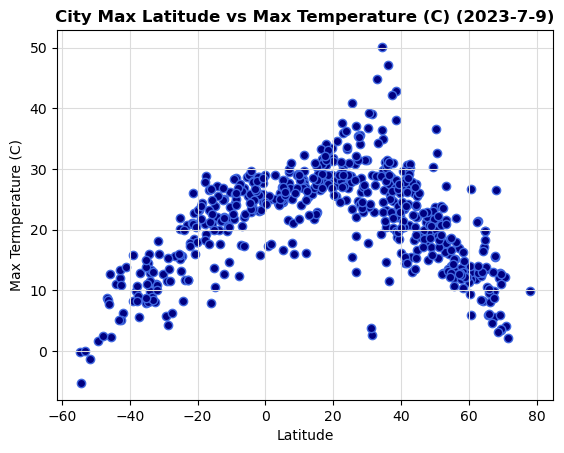

In [8]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor = "royalblue", color = "navy", marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Max Temperature (C) (2023-7-9)", weight = "bold")
plt.ylabel("Max Termperature (C)")
plt.xlabel("Latitude")
plt.grid(True, color = "gainsboro")

# Save the figure
plt.savefig("output_data/MWalton_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

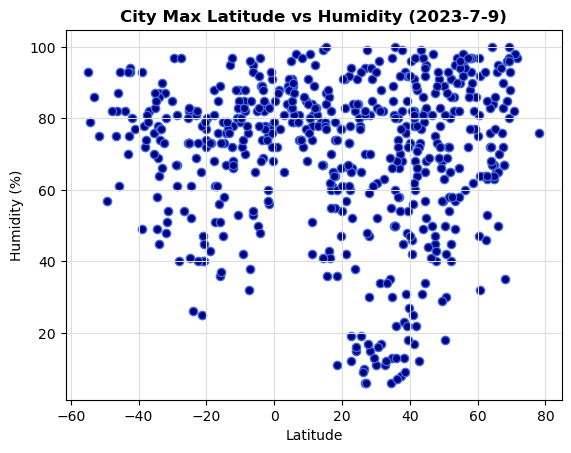

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor = "royalblue", color = "navy", marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Humidity (2023-7-9)", weight = "bold")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True, color = "gainsboro")

# Save the figure
plt.savefig("output_data/MWalton_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

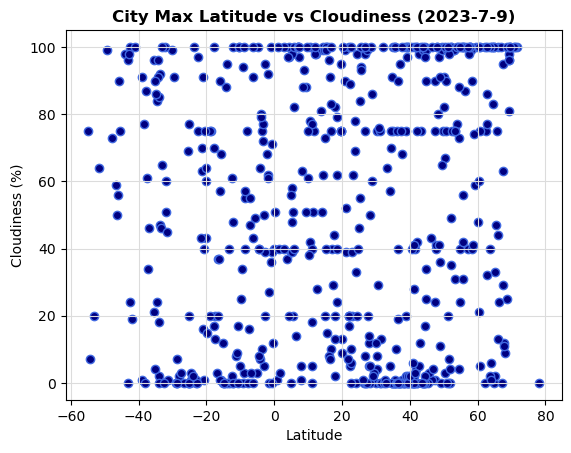

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor = "royalblue", color = "navy", marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Cloudiness (2023-7-9)", weight = "bold")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True, color = "gainsboro")

# Save the figure
plt.savefig("output_data/MWalton_Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

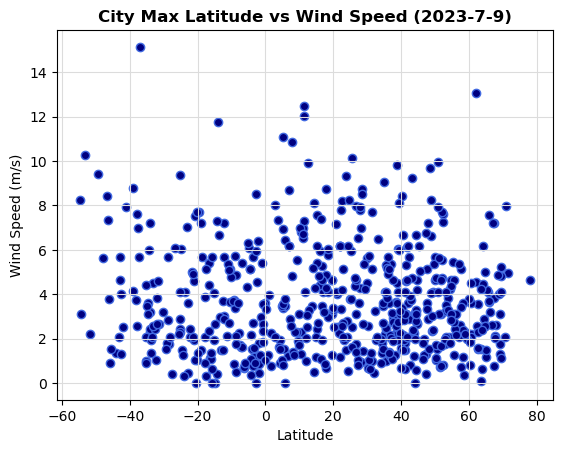

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor = "royalblue", color = "navy", marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Wind Speed (2023-7-9)", weight = "bold")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True, color = "gainsboro")

# Save the figure
plt.savefig("output_data/MWalton_Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots 
# Code ref: assistance received from AskBCS
# Code ref: "suptitle" - Y Holtz, 2023

def lin_regress(x_axis, y_axis, title, y_title):     
    
    #perform linear regression calculations
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    LR_regress_val = x_axis * slope + intercept
    LR_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    R_val = st.pearsonr(x_axis, y_axis)
    plt.scatter(x_axis, y_axis, edgecolor = "royalblue", color = "navy", marker="o")
    R_val = st.pearsonr(x_axis, y_axis)
    
    #plot linear regression 
    plt.plot(x_axis, LR_regress_val, "r-",color="red")
    print (f"The r-value is: {round(R_val[0], 2)}")
    plt.suptitle(title + "\n")
    plt.title(LR_line_eq, weight='bold', color='red')
    plt.ylabel(y_title)
    plt.xlabel("Latitude")
    plt.grid(True, color = "gainsboro")
    plt.show()  


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0) = AskBCS assistance to clarify approach
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tawau,4.2498,117.8871,26.07,88,100,0.89,MY,1689463509
3,ust-nera,64.5667,143.2000,17.13,84,83,2.90,RU,1689463510
4,susuman,62.7833,148.1667,21.47,63,86,3.58,RU,1689463511
6,praia da vitoria,38.7333,-27.0667,22.14,78,75,4.51,PT,1689463511
8,yellowknife,62.4560,-114.3525,21.29,46,75,2.57,CA,1689463512


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0) = AskBCS assistance to clarify approach
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,6.24,80,19,2.54,CL,1689463509
2,trinidad,-14.8333,-64.9000,23.99,73,0,0.00,BO,1689463510
5,edinburgh of the seven seas,-37.0676,-12.3116,12.93,82,46,15.15,SH,1689463511
7,port douglas,-16.4833,145.4667,23.26,76,37,5.40,AU,1689463511
9,waitangi,-43.9535,-176.5597,11.01,82,98,1.34,NZ,1689463512


###  Temperature vs. Latitude Linear Regression Plot

/var/folders/m7/yfqdhr1157x_5xx3bb3y5s940000gn/T/ipykernel_90266/3998049449.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_axis, LR_regress_val, "r-",color="red")


The r-value is: -0.62


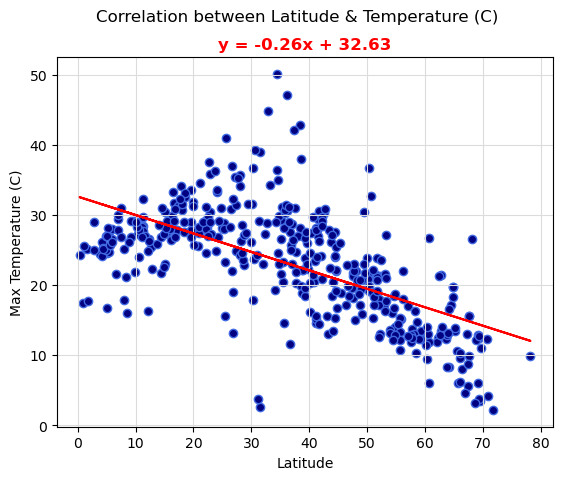

In [15]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
title = ("Correlation between Latitude & Temperature (C)")
y_title =("Max Temperature (C)")
lin_regress(x_axis,y_axis,title,y_title)

/var/folders/m7/yfqdhr1157x_5xx3bb3y5s940000gn/T/ipykernel_90266/3998049449.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_axis, LR_regress_val, "r-",color="red")


The r-value is: 0.86


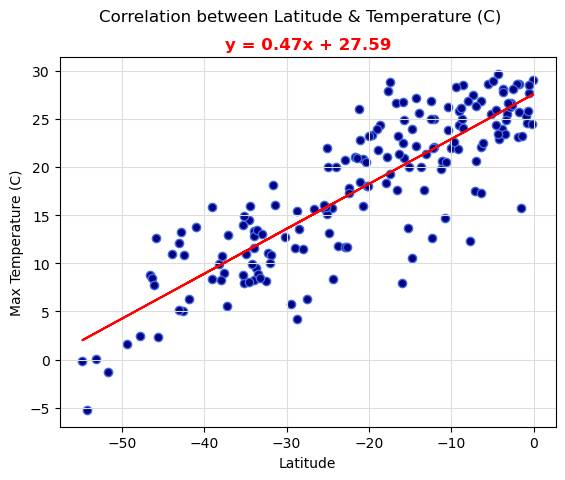

In [16]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
title = ("Correlation between Latitude & Temperature (C)")
y_title =("Max Temperature (C)")
lin_regress(x_axis,y_axis,title,y_title)

**Discussion about the linear relationship:** 
The correlction co-efficient between temperature and latitude is considered high in both the northern and southern hemispheres.  In the northern hemisphere the correlation is high negative, and in the southern hemisphere the correlation is high positive.  Higher temperatures are experienced the closer the distance to the equator (0 degrees latitude) in both hemispheres, with temperatures cooling the greater the distance from the equator.  


### Humidity vs. Latitude Linear Regression Plot

/var/folders/m7/yfqdhr1157x_5xx3bb3y5s940000gn/T/ipykernel_90266/3998049449.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_axis, LR_regress_val, "r-",color="red")


The r-value is: 0.05


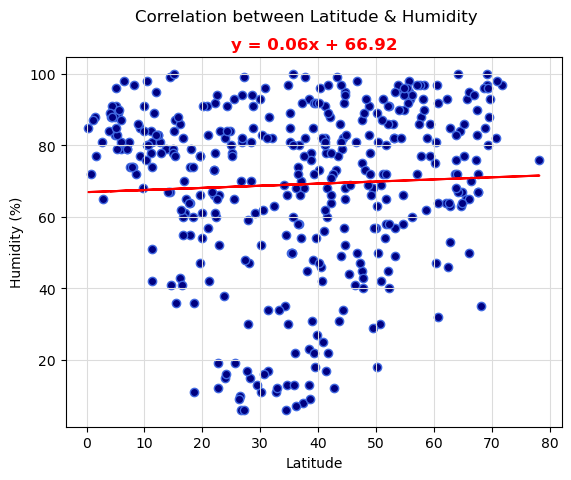

In [17]:
# Northern Hemisphere
# Linear regression on Southern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
title = ("Correlation between Latitude & Humidity")
y_title =("Humidity (%)")
lin_regress(x_axis,y_axis,title,y_title)

/var/folders/m7/yfqdhr1157x_5xx3bb3y5s940000gn/T/ipykernel_90266/3998049449.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_axis, LR_regress_val, "r-",color="red")


The r-value is: -0.04


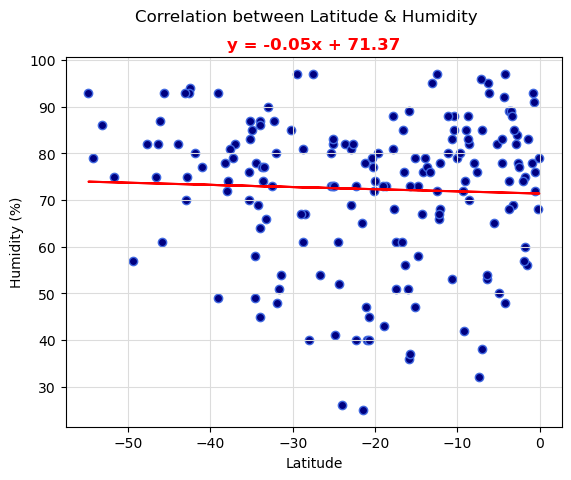

In [18]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
title = ("Correlation between Latitude & Humidity")
y_title =("Humidity (%)")
lin_regress(x_axis,y_axis,title,y_title)

**Discussion about the linear relationship:** 

The correlation between latitude and humidity in both North and South hemispheres is considered negligible with with r scores of -0.05 and -0.04 respectively.

### Cloudiness vs. Latitude Linear Regression Plot

/var/folders/m7/yfqdhr1157x_5xx3bb3y5s940000gn/T/ipykernel_90266/3998049449.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_axis, LR_regress_val, "r-",color="red")


The r-value is: 0.05


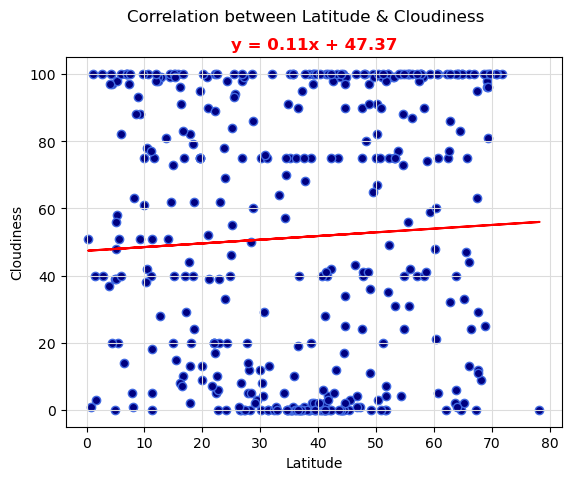

In [19]:
# Northern Hemisphere
# Linear regression on Southern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
title = ("Correlation between Latitude & Cloudiness")
y_title =("Cloudiness")
lin_regress(x_axis,y_axis,title,y_title)

The r-value is: -0.12


/var/folders/m7/yfqdhr1157x_5xx3bb3y5s940000gn/T/ipykernel_90266/3998049449.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_axis, LR_regress_val, "r-",color="red")


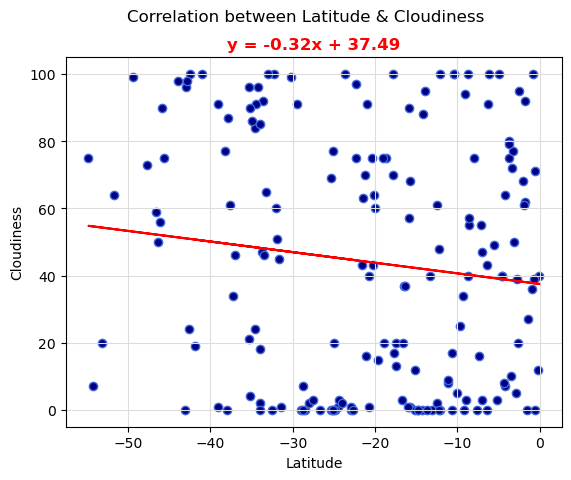

In [20]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
title = ("Correlation between Latitude & Cloudiness")
y_title =("Cloudiness")
lin_regress(x_axis,y_axis,title,y_title)

**Discussion about the linear relationship:** 

The correlation between latitude and cloudiness in the Northern hemisphere is considered weak negative and in the Southern hemisphere the correlation is considered negligible: with with r scores of -0.05 and -0.12 respectively.


### Wind Speed vs. Latitude Linear Regression Plot

/var/folders/m7/yfqdhr1157x_5xx3bb3y5s940000gn/T/ipykernel_90266/3998049449.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_axis, LR_regress_val, "r-",color="red")


The r-value is: -0.11


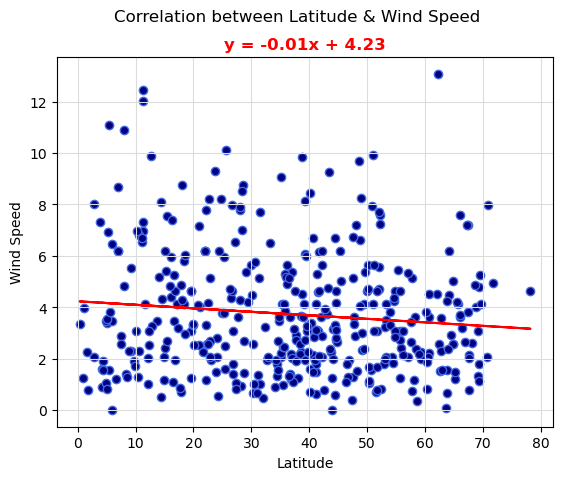

In [21]:
# Northern Hemisphere
# Linear regression on Southern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
title = ("Correlation between Latitude & Wind Speed")
y_title =("Wind Speed")
lin_regress(x_axis,y_axis,title,y_title)

/var/folders/m7/yfqdhr1157x_5xx3bb3y5s940000gn/T/ipykernel_90266/3998049449.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_axis, LR_regress_val, "r-",color="red")


The r-value is: -0.22


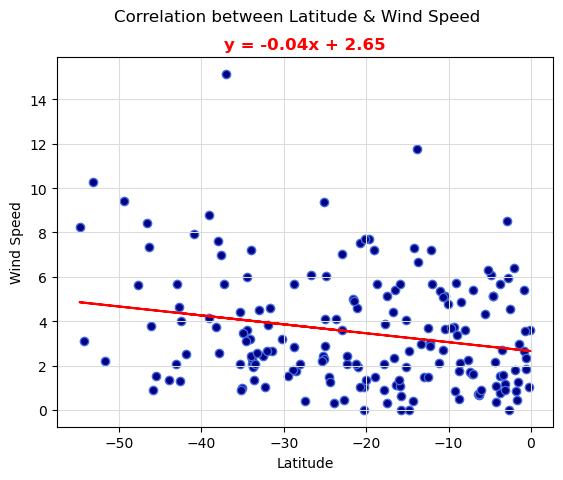

In [22]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
title = ("Correlation between Latitude & Wind Speed")
y_title =("Wind Speed")
lin_regress(x_axis,y_axis,title,y_title)

**Discussion about the linear relationship:** 

There is a week negative correlation between latitude and wind speed in both North and South hemispheres.
